/tmp/ipykernel_3558/1881516703.py:20: RuntimeWarning: invalid value encountered in power
  return (x/2)**(2/3) - (np.sin(0.5*y))**(2/3) - (np.cos(0.5*y))**(2/3)


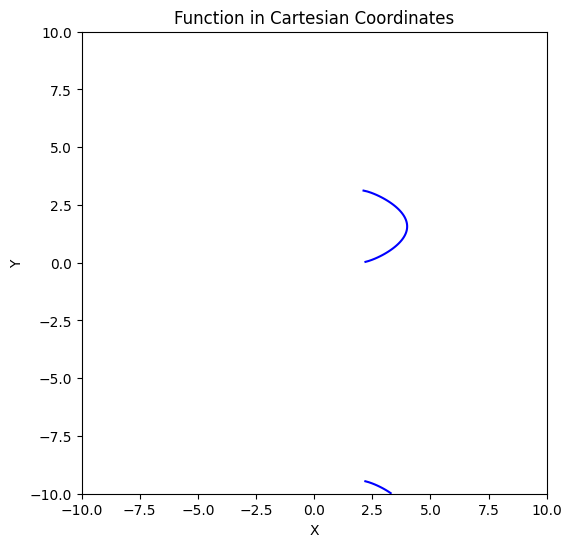

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_implicit(equation, x_range=(-10, 10), y_range=(-10, 10), num_points=400):
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    y_vals = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = equation(X, Y)
    
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, Z, levels=[0], colors='blue')
    plt.title("Function in Cartesian Coordinates")
    plt.xlabel("X")
    plt.ylabel("Y")
    # plt.savefig(f"./plots/{potential_type}_plots/function_plot.png")
    plt.show()
    
# Example usage
def implicit_function(x, y):
    return (x/2)**(2/3) - (np.sin(0.5*y))**(2/3) - (np.cos(0.5*y))**(2/3) 

plot_implicit(implicit_function, x_range=(-10, 10), y_range=(-10, 10))
